## Data Science Tutoiral 

links provided by Microsoft VS Code at https://code.visualstudio.com/docs/python/data-science-tutorial

In [29]:
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv('data.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null object
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null object
cabin        1309 non-null object
embarked     1309 non-null object
boat         1309 non-null object
body         1309 non-null object
home.dest    1309 non-null object
dtypes: int64(4), object(10)
memory usage: 143.2+ KB


In [32]:
data.replace('?', np.NaN, inplace= True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null object
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null object
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null object
home.dest    745 non-null object
dtypes: int64(4), object(10)
memory usage: 143.2+ KB


In [34]:
data.age = data.age.astype(np.float)
data.fare = data.fare.astype(np.float)


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null object
home.dest    745 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 143.2+ KB


In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [37]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


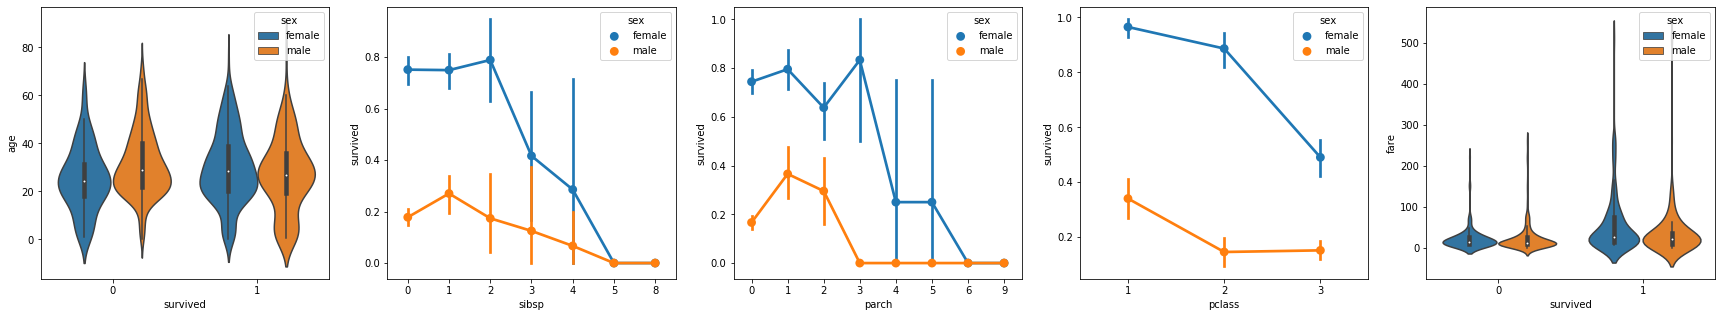

In [38]:

fig, axis = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x='survived', y='age', hue='sex', data=data, ax=axis[0])
sns.pointplot(x='sibsp', y='survived', hue='sex', data=data, ax=axis[1])
sns.pointplot(x='parch', y='survived', hue='sex', data=data, ax=axis[2])
sns.pointplot(x='pclass', y='survived', hue='sex', data=data, ax=axis[3])
sns.violinplot(x='survived', y='fare', hue='sex', data=data, ax=axis[4])


In [39]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [40]:
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [41]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis= 1)

In [42]:
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [43]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [44]:
data

,sex,pclass,age,relatives,fare,survived
0,0,1,29.0000,0,211.3375,1
1,1,1,0.9167,1,151.5500,1
2,0,1,2.0000,1,151.5500,0
3,1,1,30.0000,1,151.5500,0
4,0,1,25.0000,1,151.5500,0
5,1,1,48.0000,0,26.5500,1
6,0,1,63.0000,1,77.9583,1
7,1,1,39.0000,0,0.0000,0
8,0,1,53.0000,1,51.4792,1
9,1,1,71.0000,0,49.5042,0


In [45]:
# Splitting the data into training and testing

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
from sklearn import metrics
predict_test = model.predict(X_test)


In [50]:
metrics.accuracy_score(y_test, predict_test)

0.7464114832535885

This shows that the model is able to predict the values till 75% accurately.

## Neural networks to increase the accuracy.  

ModuleNotFoundError: No module named 'keras'